In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import numpy as np
import datetime

In [2]:
start = datetime.datetime(1965, 1, 1)
end = datetime.datetime(2015, 1, 1)

# Creating a Dataframe using data from FRED
df = pdr.fred.FredReader(["FEDFUNDS","UNRATE","GS5","MSACSR"],start,end).read()

# Naming the Columns
df.columns = ["Fed Funds","Unemployment","5 Year Treasury","Housing Supply"]

<AxesSubplot:>

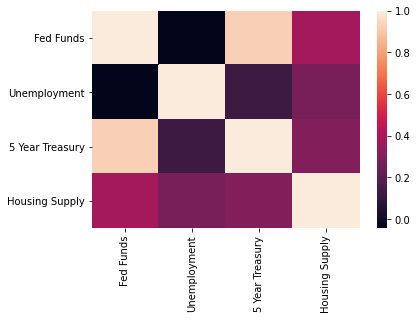

In [3]:
myBasicCorr = df.corr()
sns.heatmap(myBasicCorr)

At first glance, it doesn’t seem like we’ll be able to glean much from the heatmap. Well, that’s because this is a correlation heatmap in its most basic state. 

In the following sections I will be walking you through several of the most common ways that a correlation heatmap is formatted so that your data can be presented in a way that is both effective and visually appealing.

While the use of a heatmap allows for interpretation of data based on the color, the argument annot = True is usually passed in the sns.heatmap() function to display the correlation coefficient to facilitate easier interpretation of the heatmap. This is done like so:

<AxesSubplot:>

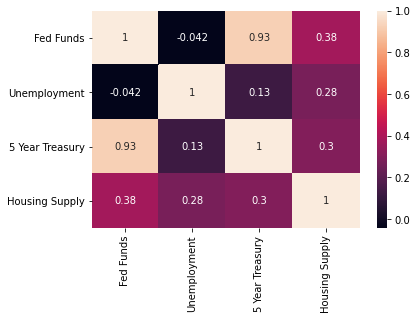

In [4]:
sns.heatmap(myBasicCorr, annot = True)

Positioning of Annotation
By default, the annotation for the correlation coefficient is positioned in the center of each cell. 

However, in some cases, you may wish to customize the position of the annotations. Let’s see how we can go about this.

We will first have to create a new dictionary, akws, containing the “ha” and “va” keywords like so:

In [5]:
akws = {"ha": 'left',"va": 'top'}

We then pass the argument annot_kws = akws when creating our heatmap.

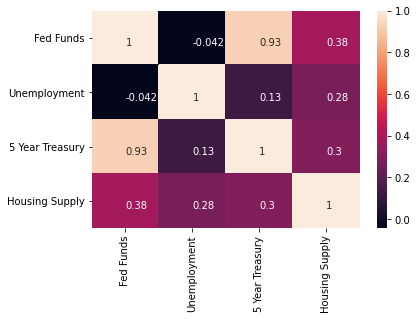

In [6]:
ax = sns.heatmap(myBasicCorr, annot=True, annot_kws=akws)

<AxesSubplot:>

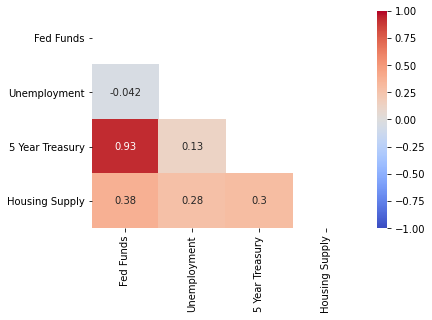

In [7]:
mask = np.zeros(myBasicCorr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(myBasicCorr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask)